In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image, circled_image
from plottable.formatters import decimal_to_percent
import psycopg2 as pg
import os
from dotenv import load_dotenv


load_dotenv()
current_directory = os.environ["current_directory"]

In [6]:
players_TAA = pd.read_csv("data\players.csv")

In [7]:
players_TAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      695 non-null    int64  
 1   height                  695 non-null    object 
 2   weight                  695 non-null    int64  
 3   college                 695 non-null    object 
 4   position                695 non-null    object 
 5   name                    695 non-null    object 
 6   tackles_above_expected  695 non-null    float64
 7   star_1_made             695 non-null    int64  
 8   star_1_missed           695 non-null    int64  
 9   star_2_made             695 non-null    int64  
 10  star_2_missed           695 non-null    int64  
 11  star_3_made             695 non-null    int64  
 12  star_3_missed           695 non-null    int64  
 13  star_4_made             695 non-null    int64  
 14  star_4_missed           695 non-null    in

In [8]:
connection_string = os.environ["connection_string"]
conn = pg.connect(connection_string)
cur = conn.cursor()
cur.execute("""SELECT DISTINCT p.id, p.name, t.team, p.position
                FROM players AS p
                JOIN tracking AS t ON p.id = t.player_id
                WHERE p.position IN (
                    'OLB', 'CB', 'SS', 'ILB', 'DT', 'FS',
                    'MLB', 'NT', 'DB', 'DE'
                    )
                """)
defensive_players = cur.fetchall()

In [9]:
cols = [
        "id",
        "Player",
        "Team",
        "Position"
    ]
players_with_team = pd.DataFrame(defensive_players, columns = cols)

In [10]:
players_TAA = pd.merge(players_TAA, players_with_team[['id', 'Team']], on='id', how='left')

In [11]:
players_TAA

,id,height,weight,college,position,name,tackles_above_expected,star_1_made,star_1_missed,star_2_made,...,star_4_made,star_4_missed,star_5_made,star_5_missed,star_1_pct,star_2_pct,star_3_pct,star_4_pct,star_5_pct,Team
0,54704,6-1,201,Yale,FS,Rodney Thomas,6.205331,2,0,1,...,2,14,6,55,1.000000,0.500000,0.000000,0.125000,0.098361,IND
1,43350,5-11,205,Ohio State,SS,Vonn Bell,2.074235,9,0,4,...,1,26,2,47,1.000000,0.363636,0.121212,0.037037,0.040816,CIN
2,53641,6-1,195,Pittsburgh,SS,Damar Hamlin,6.470197,3,1,7,...,3,13,2,56,0.750000,0.583333,0.266667,0.187500,0.034483,BUF
3,46194,5-9,184,Pittsburgh,CB,Avonte Maddox,-4.644341,5,9,7,...,1,4,0,48,0.357143,0.636364,0.066667,0.200000,0.000000,PHI
4,52416,6-3,225,Clemson,DB,Isaiah Simmons,-1.495519,5,5,8,...,4,28,1,57,0.500000,0.380952,0.151515,0.125000,0.017241,ARI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,54708,6-3,204,Washington State,CB,Jaylen Watson,1.321919,13,4,6,...,1,12,0,73,0.764706,0.352941,0.217391,0.076923,0.000000,KC
697,48026,5-11,200,Penn State,SS,Nick Scott,-1.196830,6,3,1,...,1,20,1,81,0.666667,0.142857,0.095238,0.047619,0.012195,LA
698,42488,5-11,192,Memphis,FS,Bobby McCain,2.430165,4,0,8,...,1,29,2,60,1.000000,0.533333,0.083333,0.033333,0.032258,WAS
699,53476,5-10,180,Florida State,CB,Asante Samuel,-0.430382,13,6,3,...,0,15,2,74,0.684211,0.375000,0.187500,0.000000,0.026316,LAC


In [12]:
players_TAA['logo'] = players_TAA['Team'].apply(
        lambda x: 
    f"{current_directory}/team_logos/{x}_logo.png"
    )

In [13]:
players_TAA.rename(columns = {'tackles_above_expected': 'tackles_above_average'}, inplace = True)

In [14]:
players_TAA = players_TAA.sort_values(by = 'tackles_above_average', ascending = False)

In [15]:
players_TAA

,id,height,weight,college,position,name,tackles_above_average,star_1_made,star_1_missed,star_2_made,...,star_4_missed,star_5_made,star_5_missed,star_1_pct,star_2_pct,star_3_pct,star_4_pct,star_5_pct,Team,logo
672,35466,5-10,195,Rutgers,FS,Devin McCourty,9.341323,4,1,6,...,24,6,75,0.800000,0.545455,0.312500,0.111111,0.074074,NE,/Users/winch/Data Science & Machine Learning P...
172,53465,6-1,196,Oregon,FS,Jevon Holland,9.047527,5,1,7,...,48,3,88,0.833333,0.500000,0.296296,0.111111,0.032967,MIA,/Users/winch/Data Science & Machine Learning P...
664,53494,6-0,203,Syracuse,SS,Andre Cisco,8.332831,4,2,3,...,32,5,76,0.666667,0.200000,0.228571,0.135135,0.061728,JAX,/Users/winch/Data Science & Machine Learning P...
73,44925,6-0,202,Alabama,SS,Eddie Jackson,7.991751,8,4,7,...,29,1,52,0.666667,0.583333,0.250000,0.256410,0.018868,CHI,/Users/winch/Data Science & Machine Learning P...
658,46139,6-3,236,Brigham Young,ILB,Fred Warner,7.636760,4,1,5,...,22,3,45,0.800000,0.333333,0.242424,0.185185,0.062500,SF,/Users/winch/Data Science & Machine Learning P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,46456,5-9,187,Alabama-Birmingham,CB,Darious Williams,-6.235268,4,10,5,...,26,1,66,0.285714,0.500000,0.100000,0.103448,0.014925,JAX,/Users/winch/Data Science & Machine Learning P...
574,42361,6-0,197,Washington,CB,Marcus Peters,-6.429570,8,6,3,...,16,1,76,0.571429,0.230769,0.000000,0.111111,0.012987,BAL,/Users/winch/Data Science & Machine Learning P...
94,54504,6-0,195,Washington,CB,Kyler Gordon,-6.473427,14,5,7,...,17,0,50,0.736842,0.250000,0.076923,0.105263,0.000000,CHI,/Users/winch/Data Science & Machine Learning P...
160,52945,5-11,185,Arizona,CB,Jace Whittaker,-6.764939,2,3,3,...,3,0,12,0.400000,0.300000,0.083333,0.000000,0.000000,ARI,/Users/winch/Data Science & Machine Learning P...


In [16]:
players_TAA = players_TAA.drop('id', axis = 1)
players_TAA = players_TAA.reset_index(drop = True)
players_TAA.index += 1
players_TAA['Rank'] = players_TAA.index

In [17]:
top_10_players_TAA = players_TAA.head(10)

In [18]:
bottom_10_players_TAA = players_TAA.tail(10)

In [19]:
bobby_wagner = players_TAA[players_TAA['name'] == 'Bobby Wagner']

In [20]:
top_10_players_TAA_plus_bobby_wagner = pd.concat([top_10_players_TAA, bobby_wagner])

In [21]:
def get_profile_picture_file_path(player):
    divided_name = player.split()
    return f"{current_directory}/profile_photos/{divided_name[0]}_{divided_name[1]}.png"

In [22]:
top_10_players_TAA_plus_bobby_wagner['profile_picture'] = top_10_players_TAA_plus_bobby_wagner['name'].apply(get_profile_picture_file_path)

In [23]:
bottom_10_players_TAA['profile_picture'] = bottom_10_players_TAA['name'].apply(get_profile_picture_file_path)

C:\Users\winch\AppData\Local\Temp\ipykernel_49620\1403577189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_players_TAA['profile_picture'] = bottom_10_players_TAA['name'].apply(get_profile_picture_file_path)


In [28]:
top_10_players_TAA_plus_bobby_wagner['5_star_opportunities'] = top_10_players_TAA_plus_bobby_wagner['star_5_made'] + top_10_players_TAA_plus_bobby_wagner['star_5_missed']
top_10_players_TAA_plus_bobby_wagner['4_star_opportunities'] = top_10_players_TAA_plus_bobby_wagner['star_4_made'] + top_10_players_TAA_plus_bobby_wagner['star_4_missed']
top_10_players_TAA_plus_bobby_wagner['3_star_opportunities'] = top_10_players_TAA_plus_bobby_wagner['star_3_made'] + top_10_players_TAA_plus_bobby_wagner['star_3_missed'] 
top_10_players_TAA_plus_bobby_wagner['2_star_opportunities'] = top_10_players_TAA_plus_bobby_wagner['star_2_made'] + top_10_players_TAA_plus_bobby_wagner['star_2_missed'] 
top_10_players_TAA_plus_bobby_wagner['1_star_opportunities'] = top_10_players_TAA_plus_bobby_wagner['star_1_made'] + top_10_players_TAA_plus_bobby_wagner['star_1_missed'] 

In [29]:
top_10_players_TAA_plus_bobby_wagner['total_tackles'] = top_10_players_TAA_plus_bobby_wagner['star_1_made'] + top_10_players_TAA_plus_bobby_wagner['star_2_made'] + top_10_players_TAA_plus_bobby_wagner['star_3_made'] + top_10_players_TAA_plus_bobby_wagner['star_4_made'] + top_10_players_TAA_plus_bobby_wagner['star_5_made']
top_10_players_TAA_plus_bobby_wagner['total_opps'] = top_10_players_TAA_plus_bobby_wagner['5_star_opportunities'] + top_10_players_TAA_plus_bobby_wagner['4_star_opportunities'] + top_10_players_TAA_plus_bobby_wagner['3_star_opportunities'] + top_10_players_TAA_plus_bobby_wagner['2_star_opportunities'] + top_10_players_TAA_plus_bobby_wagner['1_star_opportunities']
top_10_players_TAA_plus_bobby_wagner['total_pct'] = top_10_players_TAA_plus_bobby_wagner['total_tackles'] / top_10_players_TAA_plus_bobby_wagner['total_opps']

In [59]:
top_10_players_TAA_plus_bobby_wagner = top_10_players_TAA_plus_bobby_wagner[[
    'Rank', 'profile_picture', 'name', 'logo', 'position', 'tackles_above_average',
    'star_5_made', '5_star_opportunities', 'star_5_pct',
    'star_4_made', '4_star_opportunities', 'star_4_pct',
    'star_3_made', '3_star_opportunities', 'star_3_pct',
    'star_2_made', '2_star_opportunities', 'star_2_pct',
    'star_1_made', '1_star_opportunities', 'star_1_pct',
    'total_tackles', 'total_opps', 'total_pct'
]]

In [60]:
top_10_players_TAA_plus_bobby_wagner['tackles_above_average'] = top_10_players_TAA_plus_bobby_wagner['tackles_above_average'].round(2)

C:\Users\winch\AppData\Local\Temp\ipykernel_49620\3197322792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_players_TAA_plus_bobby_wagner['tackles_above_average'] = top_10_players_TAA_plus_bobby_wagner['tackles_above_average'].round(2)


In [62]:
bg_color = "#FFFFFF"
text_color = "#000000"
    
row_colors = {"#91C465", "D0F0C0", "F0FFF0", "F5FFFA"}
    
plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"

In [63]:
top_10_players_TAA_plus_bobby_wagner.columns

Index(['Rank', 'profile_picture', 'name', 'logo', 'position',
       'tackles_above_average', 'star_5_made', '5_star_opportunities',
       'star_5_pct', 'star_4_made', '4_star_opportunities', 'star_4_pct',
       'star_3_made', '3_star_opportunities', 'star_3_pct', 'star_2_made',
       '2_star_opportunities', 'star_2_pct', 'star_1_made',
       '1_star_opportunities', 'star_1_pct', 'total_tackles', 'total_opps',
       'total_pct'],
      dtype='object')

In [80]:
top_10_players_TAA = top_10_players_TAA_plus_bobby_wagner[top_10_players_TAA_plus_bobby_wagner['name'] != 'Bobby Wagner']

In [85]:
bobby_wagner_TAA = top_10_players_TAA_plus_bobby_wagner[top_10_players_TAA_plus_bobby_wagner['name'] == 'Bobby Wagner']

In [108]:
col_defs = [
    ColumnDefinition(
        name = "Rank",
        textprops = {"ha": "center", "weight":"bold"},
        width = 0.5
    ),
    ColumnDefinition(
        name = "profile_picture",
        textprops = {"ha": "center", "va":"center", "color": bg_color},
        width = 0.5,
        plot_fn = circled_image
    ),
    ColumnDefinition(
        name = "name",
        title = "Player",
        textprops = {"ha": "left", "weight":"bold"},
        width = 1.15,
    ),
      ColumnDefinition(
        name = "logo",
        title = "Team",
        textprops = {"ha": "center", "va":"center", "color": text_color},
        width = 0.5,
        plot_fn = image
    ),
    ColumnDefinition(
        name = "position",
        title = "Position",
        textprops = {"ha": "center"},
        width = 0.5,
    ),
    ColumnDefinition(
        name = "tackles_above_average",
        title = "TAA",
        textprops = {"ha": "center", 
                     "color": text_color, 
                     "weight":"bold", 
                     "bbox": {"boxstyle": "circle", "pad": .35}
                    },
        cmap = normed_cmap(top_10_players_TAA_plus_bobby_wagner["tackles_above_average"], cmap = plt.cm.YlGn, num_stds=2),
        width = 0.5,
        formatter =  lambda x: "{:.2f}".format(x)
    ),
    ColumnDefinition(
        name = "star_5_made",
        title = "Tk",
        group = "5 Star (0-25%)",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "5_star_opportunities",
        title = "Opp",
        group = "5 Star (0-25%)",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "star_5_pct",
        title = "%",
        group = "5 Star (0-25%)",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "star_4_made",
        title = "Tk",
        group = "4 Star (26-50%)",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "4_star_opportunities",
        group = "4 Star (26-50%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5,
    ),
     ColumnDefinition(
        name = "star_4_pct",
        group = "4 Star (26-50%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "star_3_made",
        group = "3 Star (51-75%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "3_star_opportunities",
        group = "3 Star (51-75%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "star_3_pct",
        group = "3 Star (51-75%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "star_2_made",
        group = "2 Star (76-90%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "2_star_opportunities",
        group = "2 Star (76-90%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "star_2_pct",
        group = "2 Star (76-90%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "star_1_made",
        group = "1 Star (91-100%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"    
    ),
     ColumnDefinition(
        name = "1_star_opportunities",
        group = "1 Star (91-100%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "star_1_pct",
        group = "1 Star (91-100%)",
        title = "%",
        formatter=decimal_to_percent,
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "total_tackles",
        group = "Total",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "total_opps",
        group = "Total",
        title = "Op",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "total_pct",
        group = "Total",
        title = "%",
        formatter=decimal_to_percent,
        textprops = {"ha": "center"},
        width = 0.5 
    )
    
]

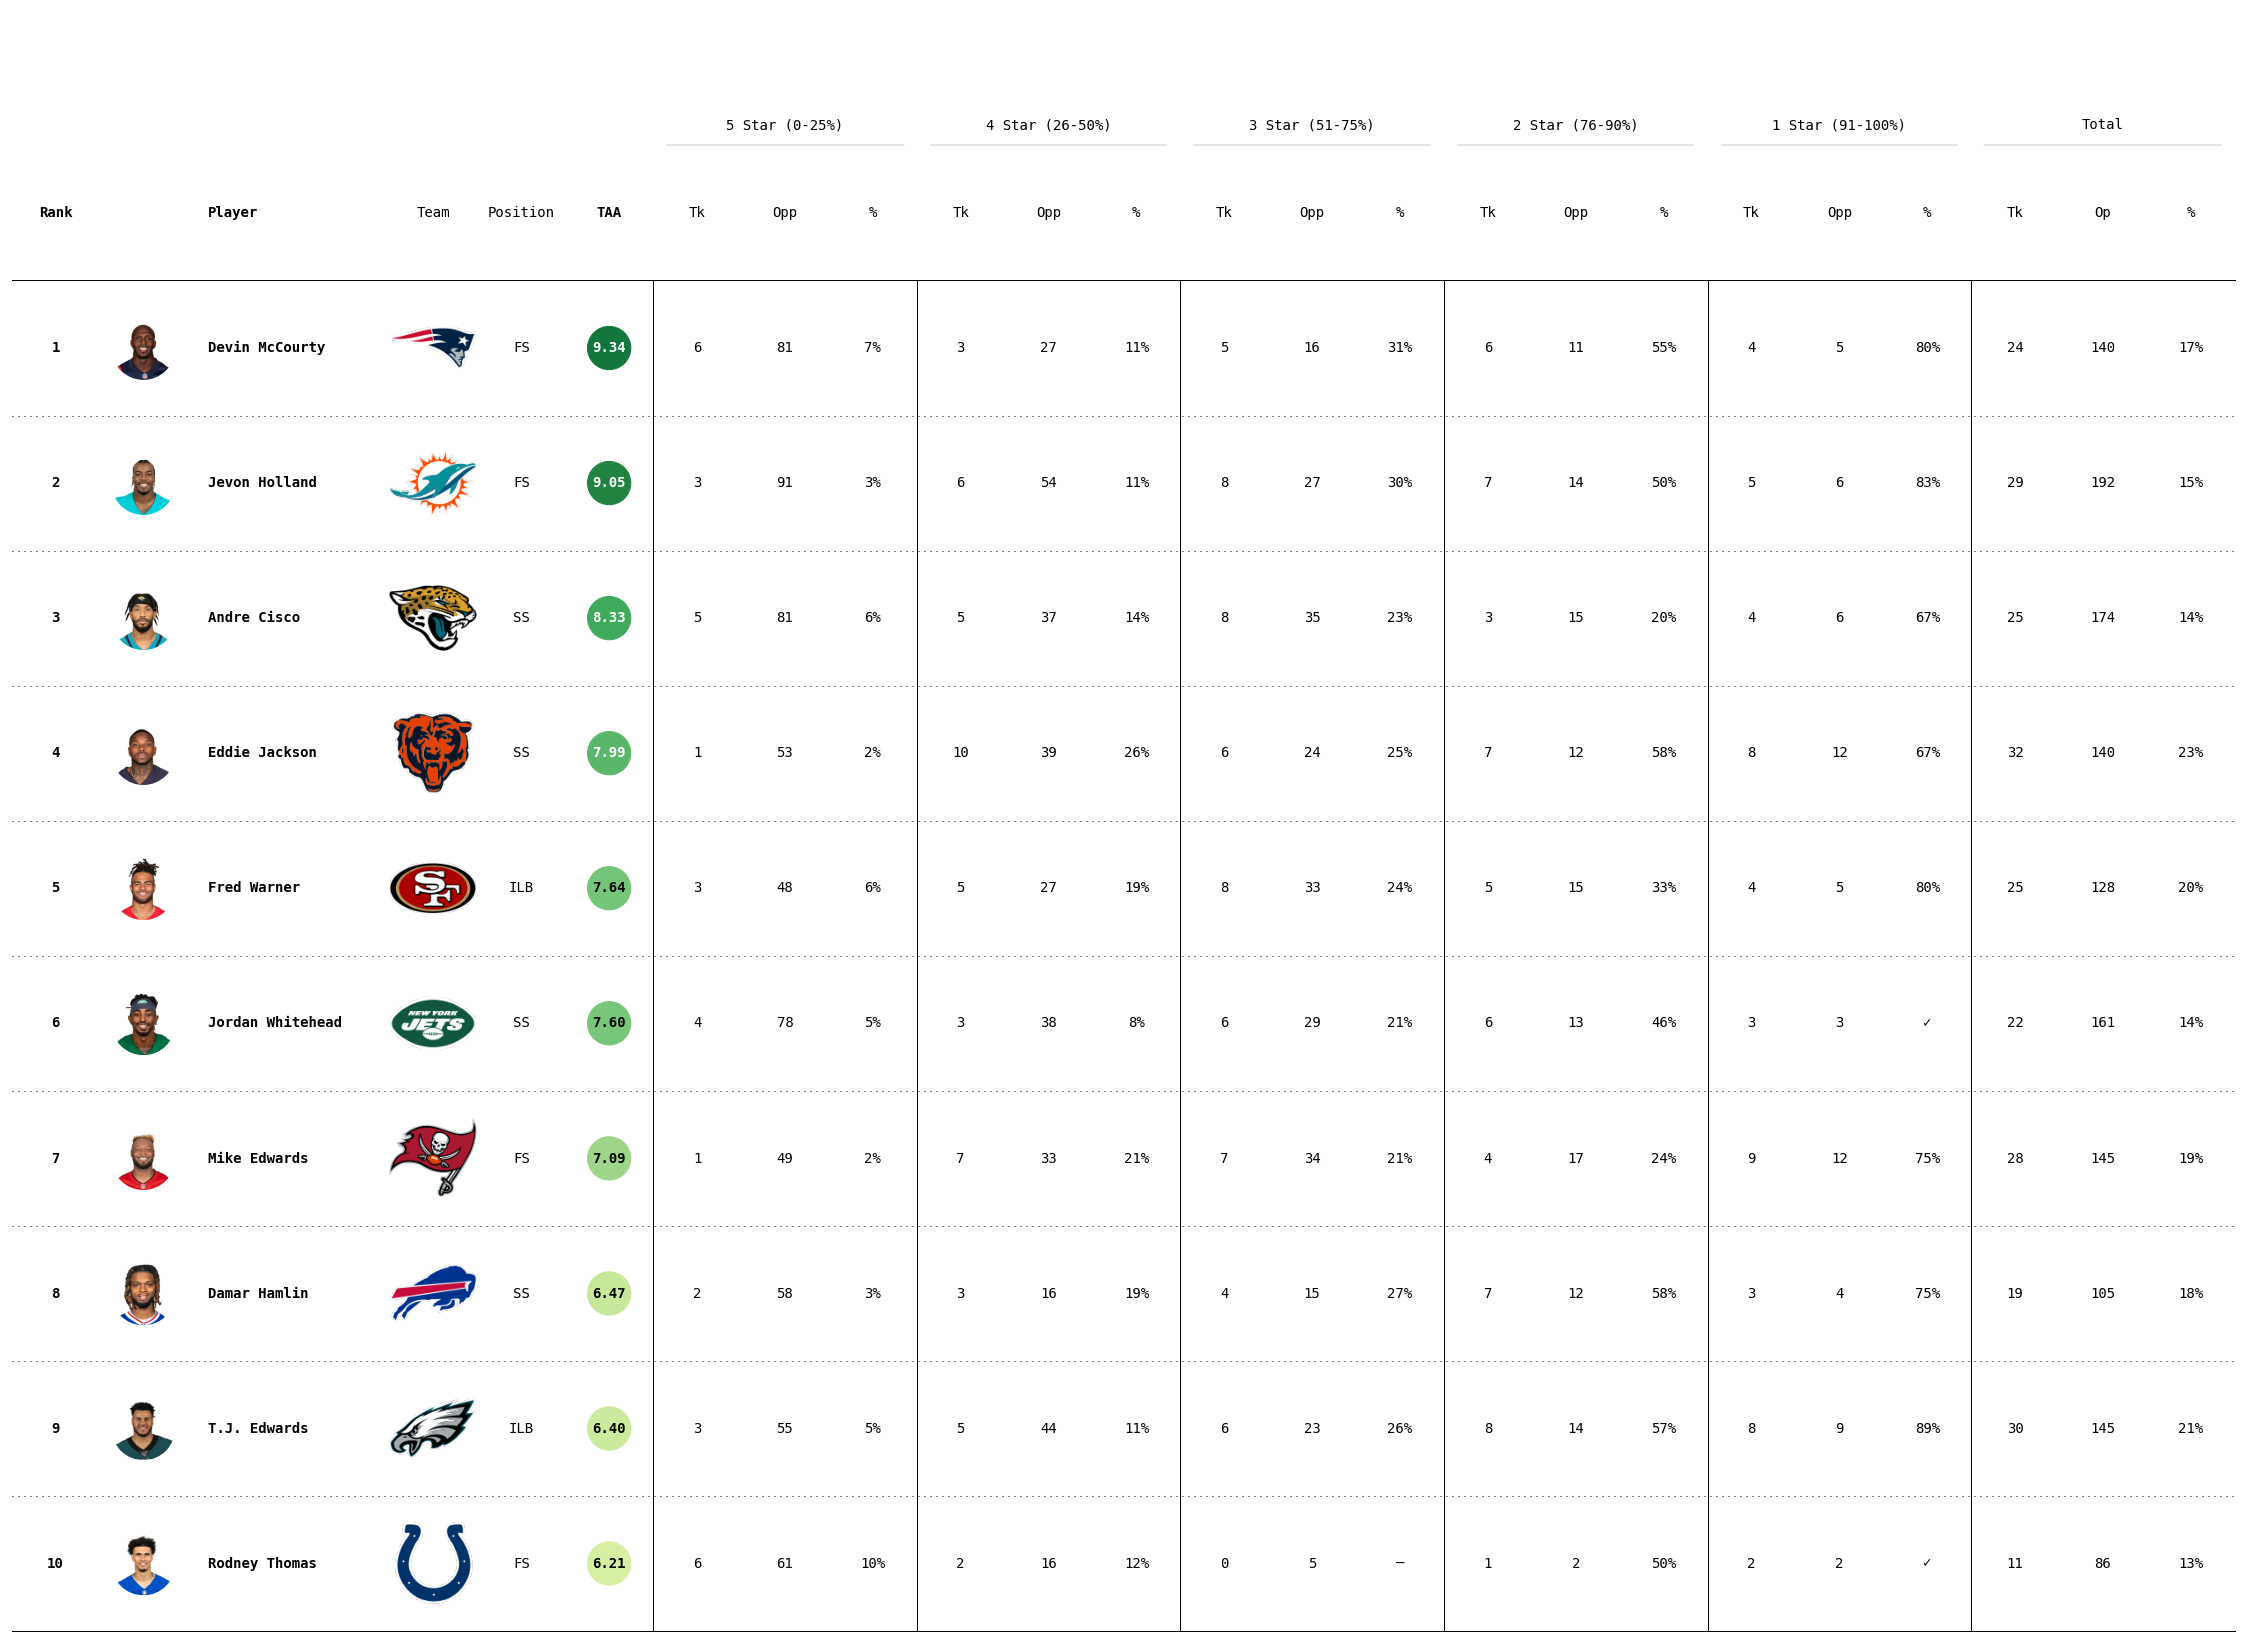

In [109]:
fig, ax = plt.subplots(figsize=(40,30))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    top_10_players_TAA,
    column_definitions = col_defs,
    index_col = "Rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1, "linestyle": (0, (1,5))},
    footer_divider = True, 
    textprops = {"fontsize":14},
    ax = ax
).autoset_fontcolors(colnames=["tackles_above_average"])
fig.savefig('Figures/top_10_TAA.png', facecolor = ax.get_facecolor(), dpi = 400)

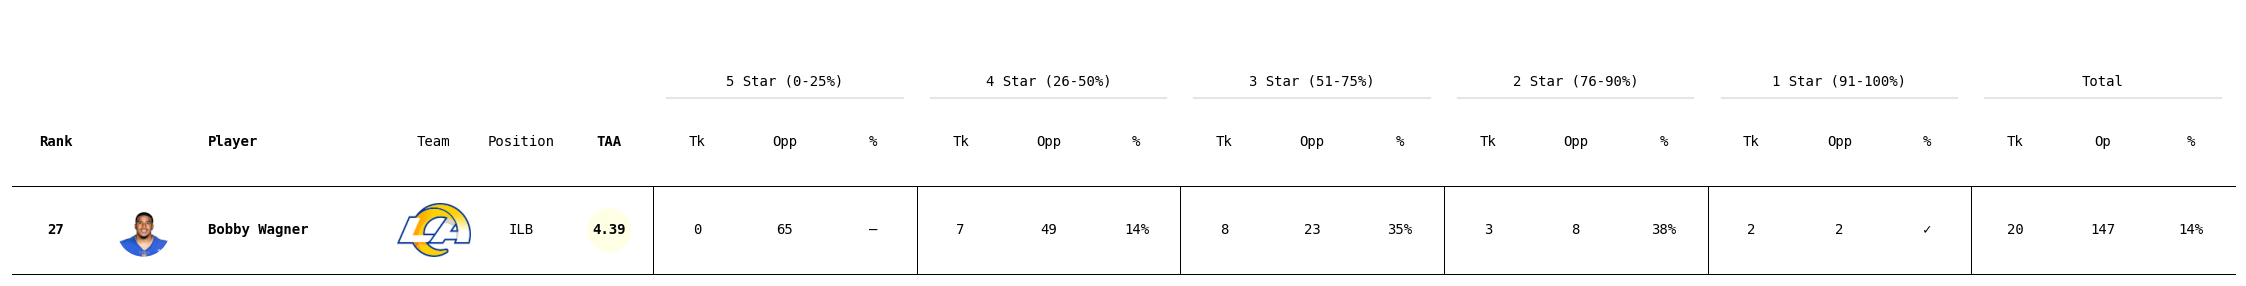

In [110]:
fig, ax = plt.subplots(figsize=(40,5))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    bobby_wagner_TAA,
    column_definitions = col_defs,
    index_col = "Rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1, "linestyle": (0, (1,5))},
    footer_divider = True, 
    textprops = {"fontsize":14},
    ax = ax
).autoset_fontcolors(colnames=["tackles_above_average"])
fig.savefig('Figures/bobby_wagner_TAA.png', facecolor = ax.get_facecolor(), dpi = 400)

In [93]:
bottom_10_players_TAA

,height,weight,college,position,name,tackles_above_average,star_1_made,star_1_missed,star_2_made,star_2_missed,...,star_5_missed,star_1_pct,star_2_pct,star_3_pct,star_4_pct,star_5_pct,Team,logo,Rank,profile_picture
692,5-11,194,Ohio State,CB,Bradley Roby,-5.085924,7,7,3,4,...,50,0.500000,0.428571,0.000000,0.062500,0.019608,NO,/Users/winch/Data Science & Machine Learning P...,692,/Users/winch/Data Science & Machine Learning P...
693,5-11,192,Weber State,CB,Taron Johnson,-5.340520,10,4,11,14,...,41,0.714286,0.440000,0.111111,0.000000,0.023810,BUF,/Users/winch/Data Science & Machine Learning P...,693,/Users/winch/Data Science & Machine Learning P...
694,6-1,235,Temple,OLB,Haason Reddick,-5.542652,3,5,1,4,...,58,0.375000,0.200000,0.000000,0.000000,0.000000,PHI,/Users/winch/Data Science & Machine Learning P...,694,/Users/winch/Data Science & Machine Learning P...
695,6-1,203,Ohio State,CB,Eli Apple,-5.853125,7,11,3,7,...,53,0.388889,0.300000,0.000000,0.000000,0.000000,CIN,/Users/winch/Data Science & Machine Learning P...,695,/Users/winch/Data Science & Machine Learning P...
696,5-10,190,Duke,CB,Michael Carter,-5.966855,9,6,3,8,...,56,0.600000,0.272727,0.238095,0.105263,0.000000,NYJ,/Users/winch/Data Science & Machine Learning P...,696,/Users/winch/Data Science & Machine Learning P...
697,5-9,187,Alabama-Birmingham,CB,Darious Williams,-6.235268,4,10,5,5,...,66,0.285714,0.500000,0.100000,0.103448,0.014925,JAX,/Users/winch/Data Science & Machine Learning P...,697,/Users/winch/Data Science & Machine Learning P...
698,6-0,197,Washington,CB,Marcus Peters,-6.429570,8,6,3,10,...,76,0.571429,0.230769,0.000000,0.111111,0.012987,BAL,/Users/winch/Data Science & Machine Learning P...,698,/Users/winch/Data Science & Machine Learning P...
699,6-0,195,Washington,CB,Kyler Gordon,-6.473427,14,5,7,21,...,50,0.736842,0.250000,0.076923,0.105263,0.000000,CHI,/Users/winch/Data Science & Machine Learning P...,699,/Users/winch/Data Science & Machine Learning P...
700,5-11,185,Arizona,CB,Jace Whittaker,-6.764939,2,3,3,7,...,12,0.400000,0.300000,0.083333,0.000000,0.000000,ARI,/Users/winch/Data Science & Machine Learning P...,700,/Users/winch/Data Science & Machine Learning P...
701,5-11,191,Florida,CB,Marco Wilson,-7.984463,9,9,8,9,...,93,0.500000,0.470588,0.068966,0.037037,0.000000,ARI,/Users/winch/Data Science & Machine Learning P...,701,/Users/winch/Data Science & Machine Learning P...


In [94]:
bottom_10_players_TAA['5_star_opportunities'] = bottom_10_players_TAA['star_5_made'] + bottom_10_players_TAA['star_5_missed']
bottom_10_players_TAA['4_star_opportunities'] = bottom_10_players_TAA['star_4_made'] + bottom_10_players_TAA['star_4_missed']
bottom_10_players_TAA['3_star_opportunities'] = bottom_10_players_TAA['star_3_made'] + bottom_10_players_TAA['star_3_missed'] 
bottom_10_players_TAA['2_star_opportunities'] = bottom_10_players_TAA['star_2_made'] + bottom_10_players_TAA['star_2_missed'] 
bottom_10_players_TAA['1_star_opportunities'] = bottom_10_players_TAA['star_1_made'] + bottom_10_players_TAA['star_1_missed'] 

C:\Users\winch\AppData\Local\Temp\ipykernel_49620\1645212488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_players_TAA['5_star_opportunities'] = bottom_10_players_TAA['star_5_made'] + bottom_10_players_TAA['star_5_missed']
C:\Users\winch\AppData\Local\Temp\ipykernel_49620\1645212488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_players_TAA['4_star_opportunities'] = bottom_10_players_TAA['star_4_made'] + bottom_10_players_TAA['star_4_missed']
C:\Users\winch\AppData\Local\Temp\

In [99]:
bottom_10_players_TAA['total_tackles'] = bottom_10_players_TAA['star_1_made'] + bottom_10_players_TAA['star_2_made'] + bottom_10_players_TAA['star_3_made'] + bottom_10_players_TAA['star_4_made'] + bottom_10_players_TAA['star_5_made']
bottom_10_players_TAA['total_opps'] = bottom_10_players_TAA['5_star_opportunities'] + bottom_10_players_TAA['4_star_opportunities'] + bottom_10_players_TAA['3_star_opportunities'] + bottom_10_players_TAA['2_star_opportunities'] + bottom_10_players_TAA['1_star_opportunities']
bottom_10_players_TAA['total_pct'] = bottom_10_players_TAA['total_tackles'] / bottom_10_players_TAA['total_opps']

C:\Users\winch\AppData\Local\Temp\ipykernel_49620\856040119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_players_TAA['total_tackles'] = bottom_10_players_TAA['star_1_made'] + bottom_10_players_TAA['star_2_made'] + bottom_10_players_TAA['star_3_made'] + bottom_10_players_TAA['star_4_made'] + bottom_10_players_TAA['star_5_made']
C:\Users\winch\AppData\Local\Temp\ipykernel_49620\856040119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_players_TAA['total_opps'] = bottom_10_player

In [100]:
bottom_10_players_TAA = bottom_10_players_TAA[[
    'Rank', 'profile_picture', 'name', 'logo', 'position', 'tackles_above_average',
    'star_5_made', '5_star_opportunities', 'star_5_pct',
    'star_4_made', '4_star_opportunities', 'star_4_pct',
    'star_3_made', '3_star_opportunities', 'star_3_pct',
    'star_2_made', '2_star_opportunities', 'star_2_pct',
    'star_1_made', '1_star_opportunities', 'star_1_pct',
    'total_tackles', 'total_opps', 'total_pct'
]]

In [101]:
bottom_10_players_TAA['tackles_above_average'] = bottom_10_players_TAA['tackles_above_average'].round(2)

In [102]:
bottom_10_players_TAA

,Rank,profile_picture,name,logo,position,tackles_above_average,star_5_made,5_star_opportunities,star_5_pct,star_4_made,...,star_3_pct,star_2_made,2_star_opportunities,star_2_pct,star_1_made,1_star_opportunities,star_1_pct,total_tackles,total_opps,total_pct
692,692,/Users/winch/Data Science & Machine Learning P...,Bradley Roby,/Users/winch/Data Science & Machine Learning P...,CB,-5.09,1,51,0.019608,1,...,0.000000,3,7,0.428571,7,14,0.500000,12,96,0.125000
693,693,/Users/winch/Data Science & Machine Learning P...,Taron Johnson,/Users/winch/Data Science & Machine Learning P...,CB,-5.34,1,42,0.023810,0,...,0.111111,11,25,0.440000,10,14,0.714286,25,140,0.178571
694,694,/Users/winch/Data Science & Machine Learning P...,Haason Reddick,/Users/winch/Data Science & Machine Learning P...,OLB,-5.54,0,58,0.000000,0,...,0.000000,1,5,0.200000,3,8,0.375000,4,100,0.040000
695,695,/Users/winch/Data Science & Machine Learning P...,Eli Apple,/Users/winch/Data Science & Machine Learning P...,CB,-5.85,0,53,0.000000,0,...,0.000000,3,10,0.300000,7,18,0.388889,10,109,0.091743
696,696,/Users/winch/Data Science & Machine Learning P...,Michael Carter,/Users/winch/Data Science & Machine Learning P...,CB,-5.97,0,56,0.000000,2,...,0.238095,3,11,0.272727,9,15,0.600000,19,122,0.155738
697,697,/Users/winch/Data Science & Machine Learning P...,Darious Williams,/Users/winch/Data Science & Machine Learning P...,CB,-6.24,1,67,0.014925,3,...,0.100000,5,10,0.500000,4,14,0.285714,15,140,0.107143
698,698,/Users/winch/Data Science & Machine Learning P...,Marcus Peters,/Users/winch/Data Science & Machine Learning P...,CB,-6.43,1,77,0.012987,2,...,0.000000,3,13,0.230769,8,14,0.571429,14,139,0.100719
699,699,/Users/winch/Data Science & Machine Learning P...,Kyler Gordon,/Users/winch/Data Science & Machine Learning P...,CB,-6.47,0,50,0.000000,2,...,0.076923,7,28,0.250000,14,19,0.736842,25,142,0.176056
700,700,/Users/winch/Data Science & Machine Learning P...,Jace Whittaker,/Users/winch/Data Science & Machine Learning P...,CB,-6.76,0,12,0.000000,0,...,0.083333,3,10,0.300000,2,5,0.400000,6,42,0.142857
701,701,/Users/winch/Data Science & Machine Learning P...,Marco Wilson,/Users/winch/Data Science & Machine Learning P...,CB,-7.98,0,93,0.000000,1,...,0.068966,8,17,0.470588,9,18,0.500000,20,184,0.108696


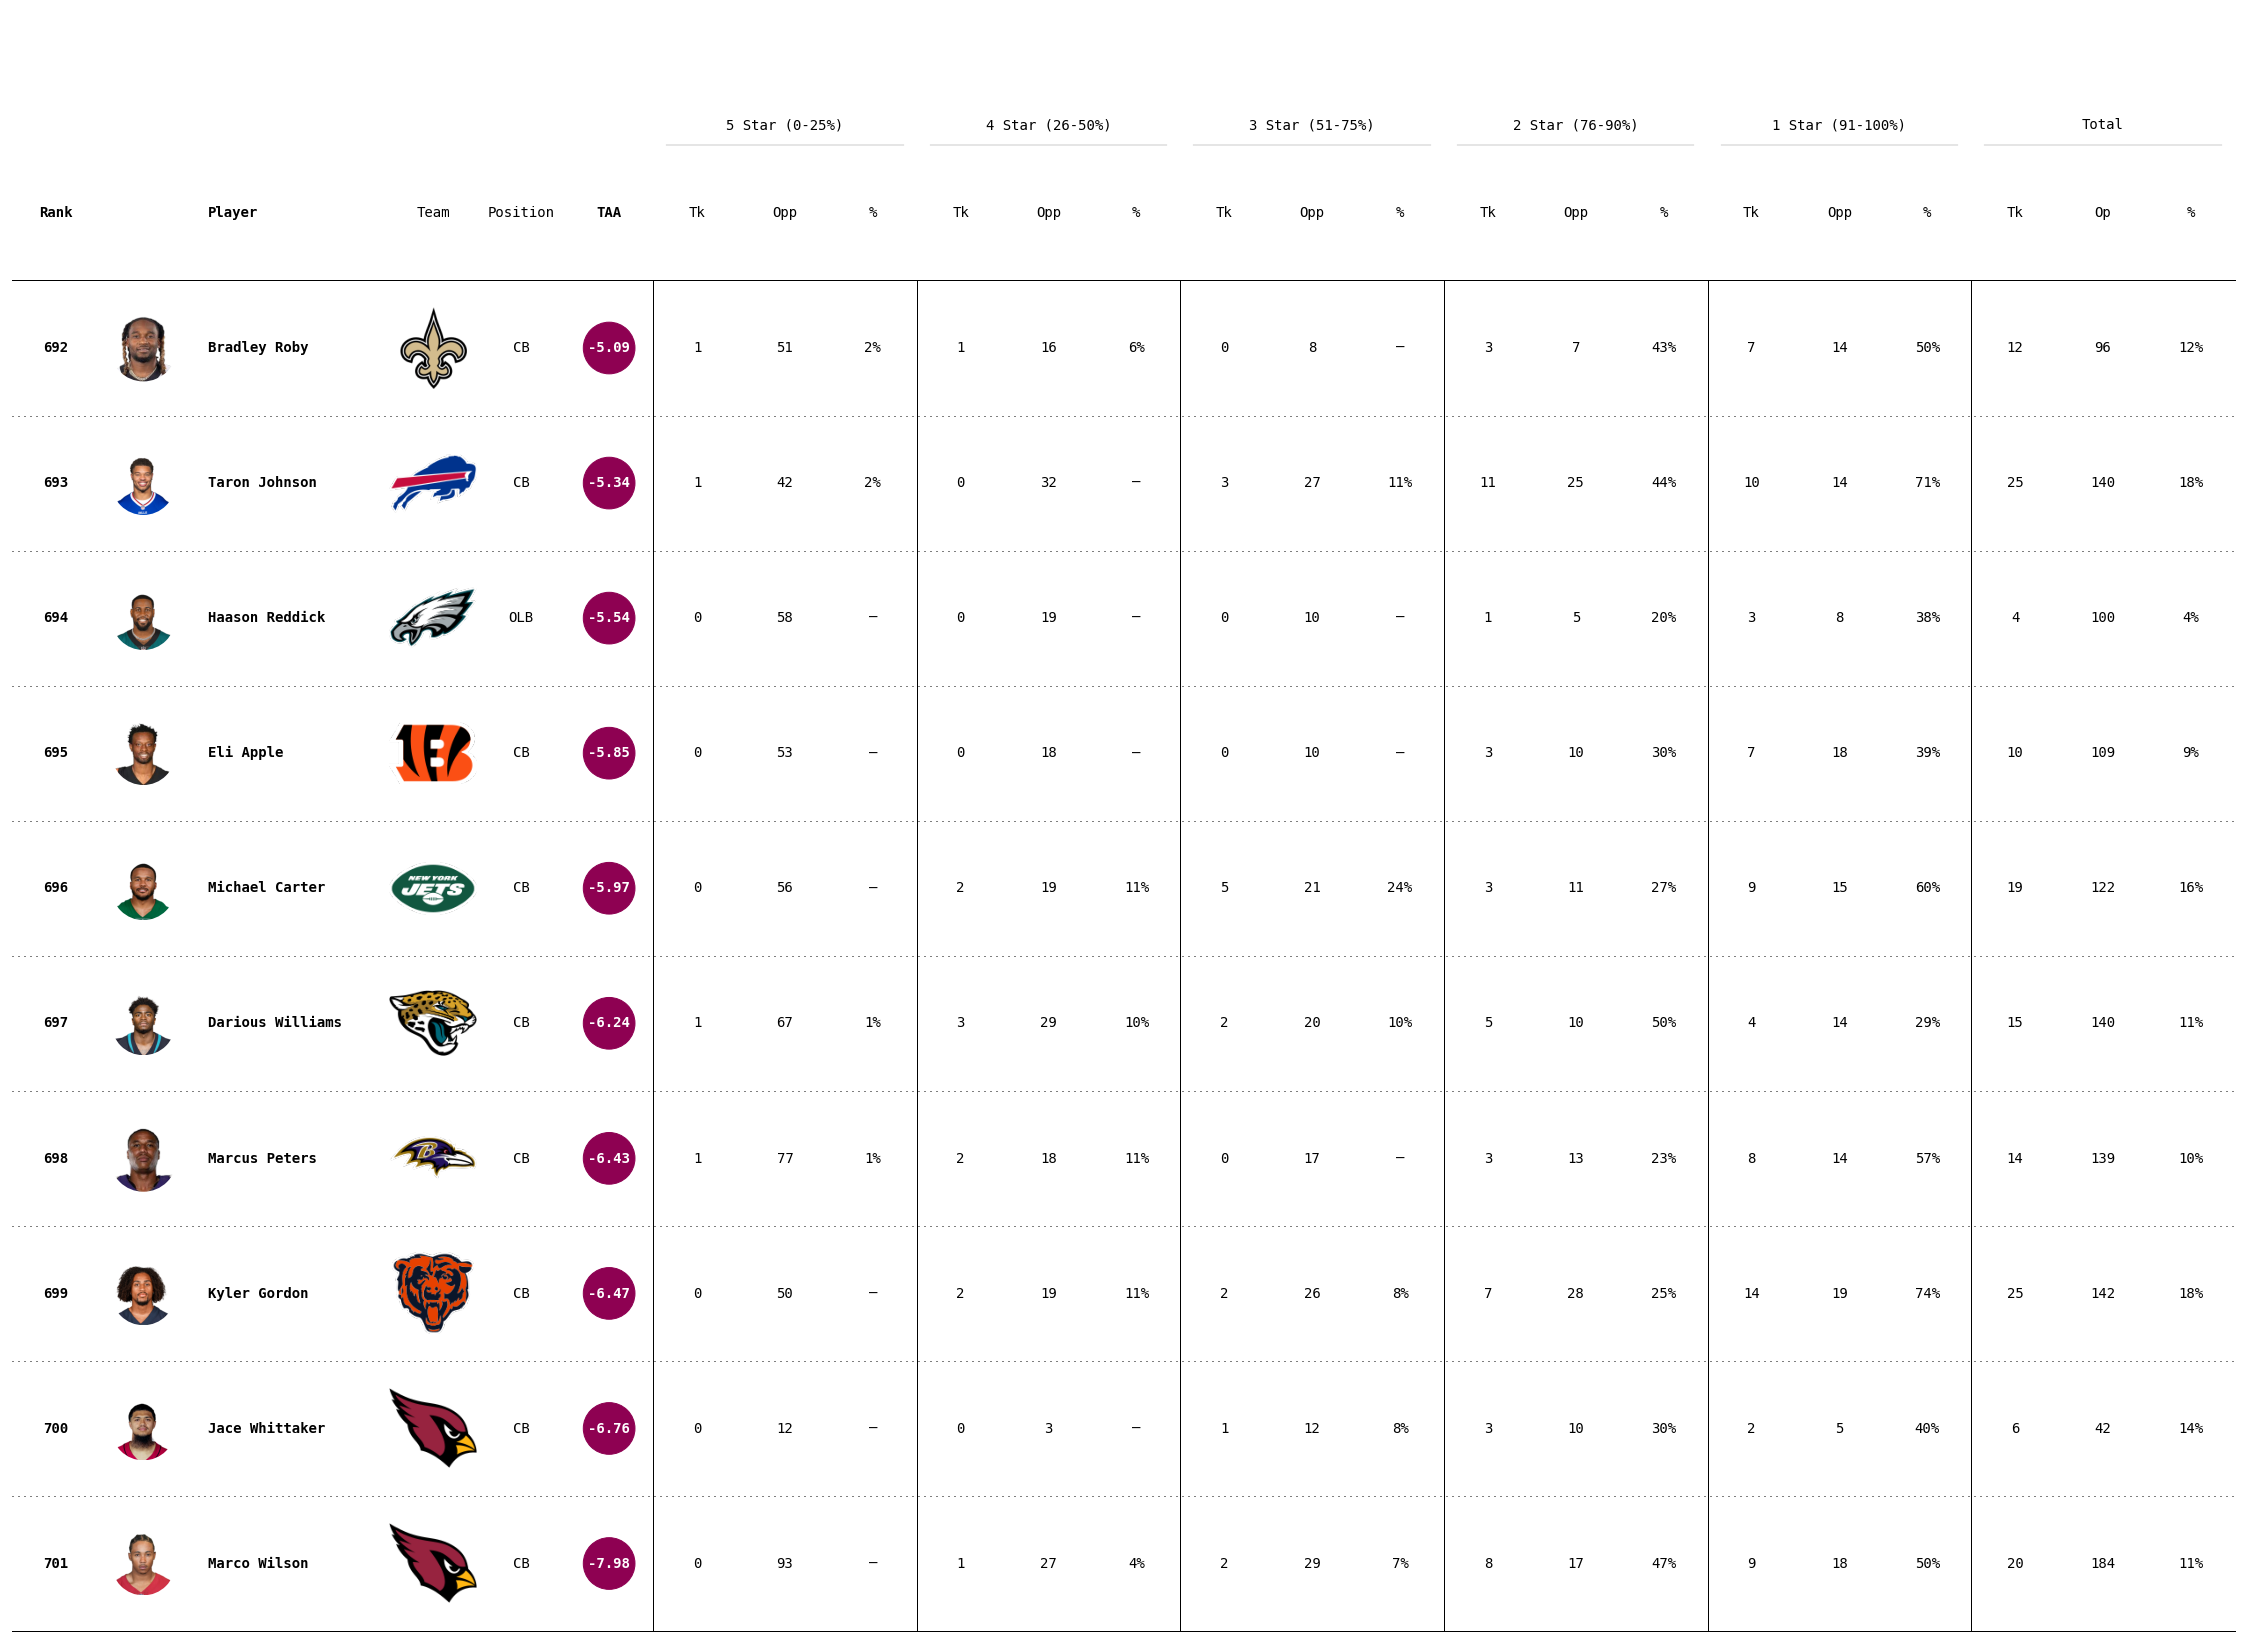

In [107]:
fig, ax = plt.subplots(figsize=(40,30))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    bottom_10_players_TAA,
    column_definitions = col_defs,
    index_col = "Rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1, "linestyle": (0, (1,5))},
    footer_divider = True, 
    textprops = {"fontsize":14},
    ax = ax
).autoset_fontcolors(colnames=["tackles_above_average"])
fig.savefig('Figures/bottom_10_TAA.png', facecolor = ax.get_facecolor(), dpi = 400)